# Pothole Detection
This dataset contains 665 images with bounding box annotations provided in PASCAL VOC format for the creation of detection models and can work as POC/POV for the maintenance of roads.

**Dataset Overview**
*   Total Images: 665
*   The dataset consists solely of images (no tabular labels uploaded yet).
*   Images appear to be real-world pothole scenes, captured under varying conditions.









In [2]:
from google.colab import files
files.upload()


Saving images.zip to images.zip


In [3]:
import zipfile
with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("images")


In [5]:
import os


image_files = os.listdir("images/images")
print(image_files[:5])


['potholes129.png', 'potholes475.png', 'potholes148.png', 'potholes413.png', 'potholes190.png']


# Random Sample Images

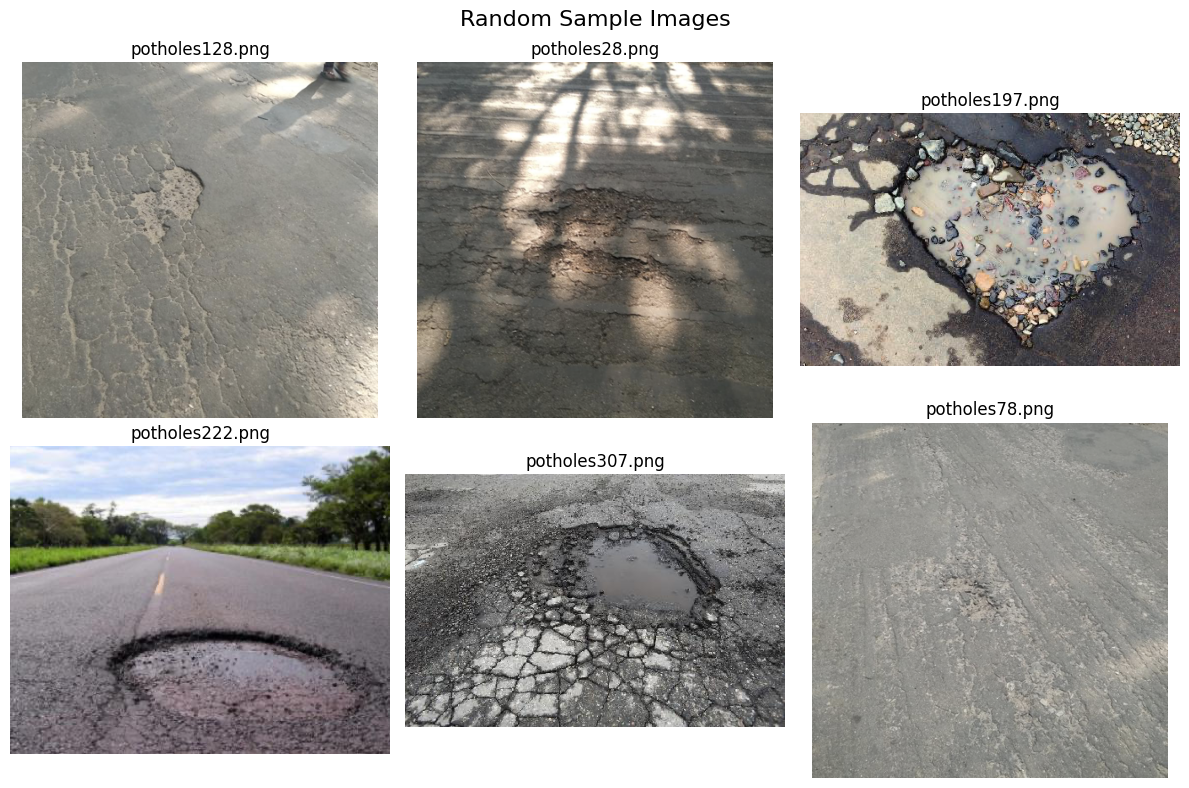

In [20]:
import random

sample_images = random.sample(image_files, 6)
plt.figure(figsize=(12, 8))

for i, file in enumerate(sample_images):
    try:
        img = Image.open(os.path.join(image_folder, file))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(file)
        plt.axis('off')
    except:
        continue

plt.suptitle("Random Sample Images", fontsize=16)
plt.tight_layout()
plt.show()


In [7]:
!mv images/images image_data


In [9]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Update path as needed
image_folder = "image_data"
image_files = os.listdir(image_folder)
print(f"Total images: {len(image_files)}")


Total images: 665


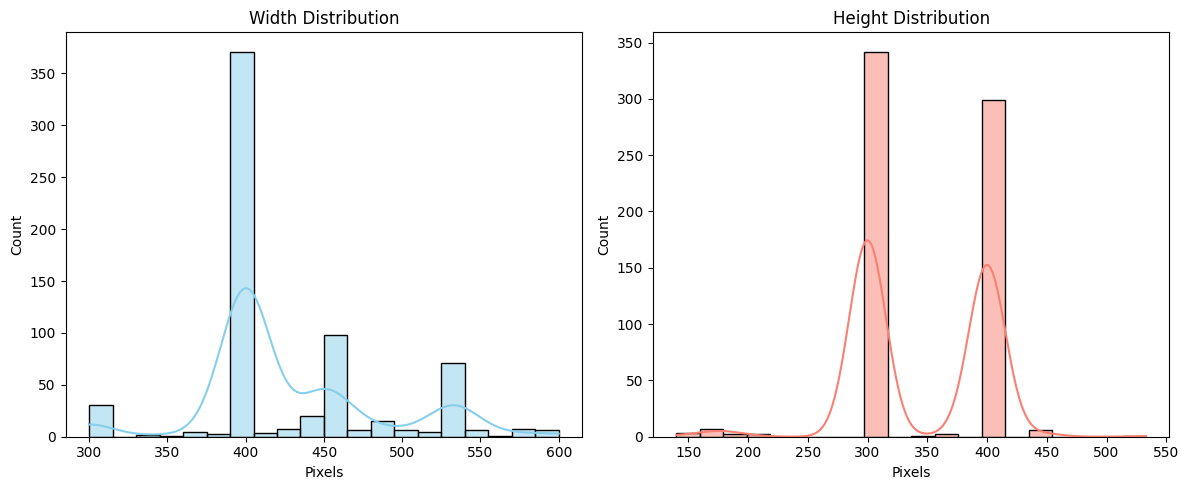

In [17]:
import seaborn as sns
widths, heights = [], []

for file in image_files:
    try:
        img = Image.open(os.path.join(image_folder, file))
        widths.append(img.width)
        heights.append(img.height)
    except:
        continue

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, kde=True, color='skyblue')
plt.title('Width Distribution')
plt.xlabel('Pixels')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, kde=True, color='salmon')
plt.title('Height Distribution')
plt.xlabel('Pixels')

plt.tight_layout()
plt.show()


**Inference:**
1.   Width Distribution (Left Plot)

*   The majority of the images have a width of approximately 400 pixels.
*   A smaller number of images have widths in the 450–550 pixel range.
*   Right-skewed tail: A few images go up to 600 pixels wide.

2.   Height Distribution (Right Plot)

*   This suggests that there are two dominant image aspect ratios in the dataset (e.g., 400×300 and 400×400), likely due to:
    *   Different camera orientations
    *   Different image sources
*   Very few images are below 200 pixels, and hardly any exceed 450 pixels in height.








In [11]:
color_images = 0
grayscale_images = 0

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    try:
        img = Image.open(img_path)
        if img.mode in ("RGB", "RGBA"):
            color_images += 1
        else:
            grayscale_images += 1
    except:
        continue

print(f"Color images: {color_images}")
print(f"Grayscale images: {grayscale_images}")


Color images: 665
Grayscale images: 0


# Brightness Distribution plot

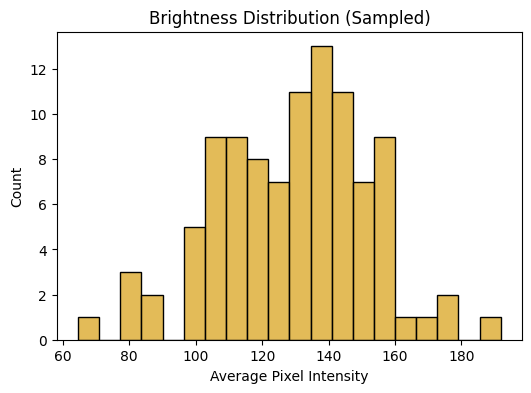

In [18]:
brightness = []

for file in image_files[:100]:
    try:
        img = Image.open(os.path.join(image_folder, file)).convert("L")
        brightness.append(np.array(img).mean())
    except:
        continue

plt.figure(figsize=(6, 4))
sns.histplot(brightness, bins=20, color='goldenrod')
plt.title("Brightness Distribution (Sampled)")
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Count")
plt.show()


**Inference:**

*   Most images have average brightness between 120–150, indicating good natural lighting in the dataset.
*   The distribution is nearly symmetric, showing a balanced range of lighting conditions.
*   Some images are darker (brightness 65–100), which may represent shaded or poorly lit road conditions.
*   A few images are brighter (170–190), possibly due to sunlight glare or high exposure.
*   Lighting variation is realistic for pothole detection, but using brightness augmentations can further improve model robustness.







In [15]:
corrupted_images = []

for file in image_files:
    try:
        img = Image.open(os.path.join(image_folder, file))
        img.verify()
    except:
        corrupted_images.append(file)

print(f"Corrupted images: {len(corrupted_images)}")
if corrupted_images:
    print("Sample corrupted:", corrupted_images[:5])


Corrupted images: 0


# Image file size Distribution plot

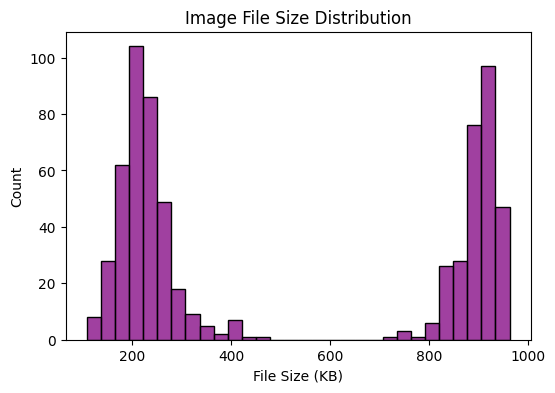

In [21]:
file_sizes_kb = []

for file in image_files:
    try:
        size = os.path.getsize(os.path.join(image_folder, file)) / 1024
        file_sizes_kb.append(size)
    except:
        continue

plt.figure(figsize=(6, 4))
sns.histplot(file_sizes_kb, bins=30, color='purple')
plt.title("Image File Size Distribution")
plt.xlabel("File Size (KB)")
plt.ylabel("Count")
plt.show()


**Inference:**

*   Bimodal distribution with peaks around 200 KB and 900 KB.
*   Indicates images come from two different sources or settings.
*   Smaller files may be low-resolution or highly compressed.
*   Larger files are likely high-resolution or less compressed.




In [13]:
!pip install -q tensorflow


# Image Augmentation Visualization

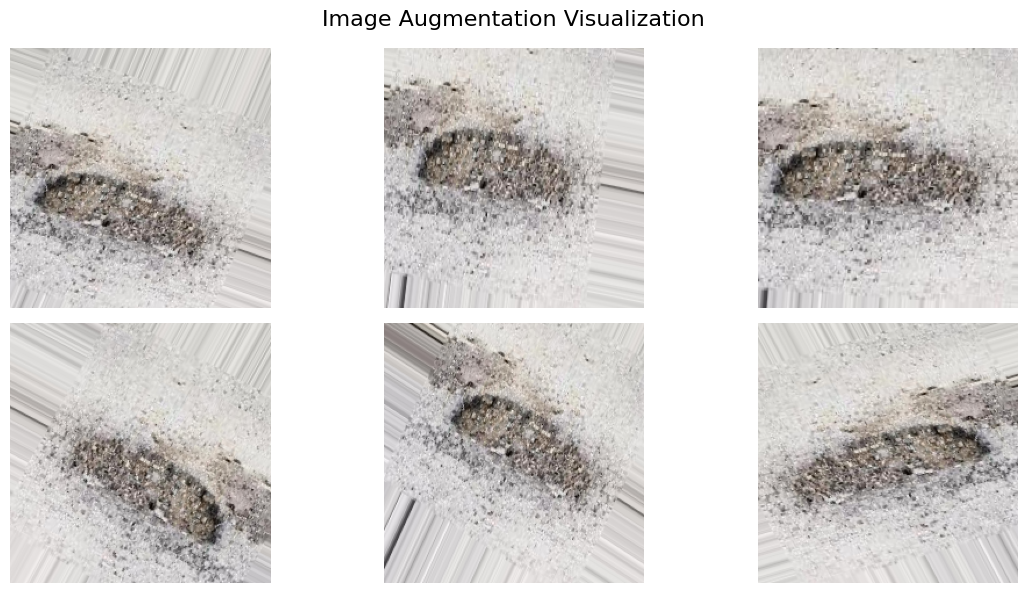

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import numpy as np
import os


sample_image = os.path.join(image_folder, image_files[0])
img = load_img(sample_image, target_size=(224, 224))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)


datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


plt.figure(figsize=(12, 6))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 3, i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i == 6:
        break

plt.suptitle("Image Augmentation Visualization", fontsize=16)
plt.tight_layout()
plt.show()


**Inference:**

*   Augmentations include rotation, flipping, zooming, and possibly brightness changes.
*   Helps improve model robustness to varied angles and conditions.

